In [1]:
# coding: utf-8
import gym
import torch.utils.data as data
from dynamics import *
from controller import *
from utils import *
from quanser_robots.common import GentlyTerminating
import time

# datasets:  numpy array, size:[sample number, input dimension]
# labels:  numpy array, size:[sample number, output dimension]

env_id = "DoublePendulum-v0"
env = GentlyTerminating(gym.make(env_id))
config_path = "config-1.yml"
config = load_config(config_path)
print_config(config_path)

************************
*** model configuration ***
load_model: false
model_path: storage/exp_1.ckpt
n_actions: 1
n_hidden: 1
n_states: 6
size_hidden: 512
use_cuda: true

*** train configuration ***
batch_size: 256
exp_number: 1
learning_rate: 0.001
n_epochs: 60
save_loss_fig: true
save_loss_fig_frequency: 10
save_model_flag: true
save_model_path: storage/exp_1.ckpt

************************
*** dataset configuration ***
load_flag: false
load_path: storage/data_exp_1.pkl
min_train_samples: 6000
mpc_dataset_split: 0.5
n_max_steps: 20000
n_mpc_episodes: 4
n_mpc_itrs: 100
n_random_episodes: 800
save_flag: true
save_path: storage/data_exp_1.pkl
testset_split: 0.2

************************
*** MPC controller configuration ***
action_high: 12
action_low: -12
gamma: 0.99
horizon: 12
max_itrs: 15
numb_bees: 8



In [2]:
model = DynamicModel(config)
data_fac = DatasetFactory(env,config)
data_fac.collect_random_dataset()

Collect random dataset shape:  (61253, 7)


In [3]:
loss = model.train(data_fac.random_trainset,data_fac.random_testset)

Total training step per epoch [192]
Epoch [10/60], Training Loss: 0.00009838, Test Loss: 0.00008559
Epoch [20/60], Training Loss: 0.00004314, Test Loss: 0.00003684
Epoch [30/60], Training Loss: 0.00003676, Test Loss: 0.00003913
Epoch [40/60], Training Loss: 0.00002508, Test Loss: 0.00005212
Epoch [50/60], Training Loss: 0.00002567, Test Loss: 0.00002503
Epoch [60/60], Training Loss: 0.00002130, Test Loss: 0.00002211


/home/xinye/projects/rl/RL-project/MPC/MPC-Double/dynamics.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda()


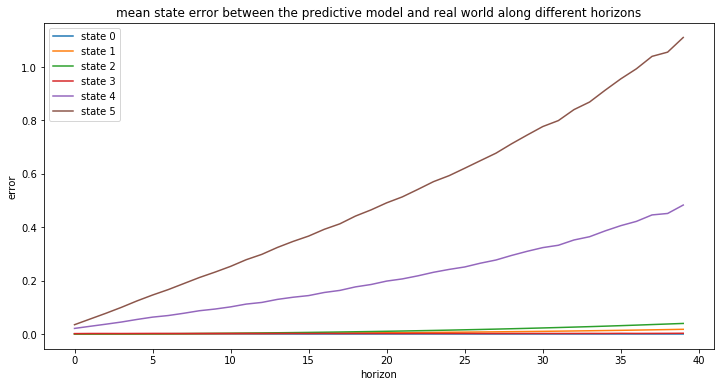

In [4]:
model.plot_model_validation(env,n_sample=200)

In [ ]:
mpc = MPC(env,config)

In [ ]:
rewards_list = []
for itr in range(config["dataset_config"]["n_mpc_itrs"]):
    t = time.time()
    print("**********************************************")
    print("The reinforce process [%s], collecting data ..." % itr)
    rewards = data_fac.collect_mpc_dataset(mpc,model)
    trainset, testset = data_fac.make_dataset()
    rewards_list += rewards
    
    plt.close("all")
    plt.figure(figsize=(12, 5))
    plt.title('Reward Trend with %s iteration' % itr)
    plt.plot(rewards_list)
    plt.savefig("storage/reward-" + str(model.exp_number) + ".png")
    print("Consume %s s in this iteration" % (time.time()-t))
    loss = model.train(trainset,testset)

**********************************************
The reinforce process [0], collecting data ...


/home/xinye/projects/rl/RL-project/MPC/MPC-Double/dynamics.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda()


Episode [0/4], Reward: 23.21185266, Step: [213/20000]
Episode [1/4], Reward: 27.52539609, Step: [251/20000]
Episode [2/4], Reward: 32.57582927, Step: [292/20000]
Episode [3/4], Reward: 25.56254045, Step: [230/20000]
Totally collect 990 data based on MPC
Saving all datas to storage/data_exp_1.pkl
Sample 5010 training data from all previous dataset, total training sample: 6000
Consume 749.9628100395203 s in this iteration
Total training step per epoch [24]
Epoch [10/60], Training Loss: 0.00002731, Test Loss: 0.00003835
Epoch [20/60], Training Loss: 0.00003321, Test Loss: 0.00005501
Epoch [30/60], Training Loss: 0.00001721, Test Loss: 0.00004732
Epoch [40/60], Training Loss: 0.00003010, Test Loss: 0.00003484
Epoch [50/60], Training Loss: 0.00001537, Test Loss: 0.00001344
Epoch [60/60], Training Loss: 0.00004381, Test Loss: 0.00006862
**********************************************
The reinforce process [1], collecting data ...
Episode [0/4], Reward: 25.19212036, Step: [233/20000]
Episode [

Epoch [50/60], Training Loss: 0.00001462, Test Loss: 0.00001820
Epoch [60/60], Training Loss: 0.00001536, Test Loss: 0.00001339
**********************************************
The reinforce process [9], collecting data ...
Episode [0/4], Reward: 18.70223147, Step: [177/20000]
Episode [1/4], Reward: 20.13592742, Step: [191/20000]
Episode [2/4], Reward: 28.27624743, Step: [258/20000]
Episode [3/4], Reward: 19.15864280, Step: [183/20000]
Totally collect 813 data based on MPC
Saving all datas to storage/data_exp_1.pkl
Sample 5187 training data from all previous dataset, total training sample: 6000
Consume 909.2783329486847 s in this iteration
Total training step per epoch [24]
Epoch [10/60], Training Loss: 0.00001425, Test Loss: 0.00002081
Epoch [20/60], Training Loss: 0.00001059, Test Loss: 0.00001118
Epoch [30/60], Training Loss: 0.00000945, Test Loss: 0.00001485
Epoch [40/60], Training Loss: 0.00001670, Test Loss: 0.00002680
Epoch [50/60], Training Loss: 0.00001980, Test Loss: 0.00001088

Epoch [10/60], Training Loss: 0.00002145, Test Loss: 0.00002099
Epoch [20/60], Training Loss: 0.00002350, Test Loss: 0.00001060
Epoch [30/60], Training Loss: 0.00001434, Test Loss: 0.00001332
Epoch [40/60], Training Loss: 0.00002180, Test Loss: 0.00002055
Epoch [50/60], Training Loss: 0.00000979, Test Loss: 0.00001162
Epoch [60/60], Training Loss: 0.00001794, Test Loss: 0.00001904
**********************************************
The reinforce process [18], collecting data ...
Episode [0/4], Reward: 29.61823306, Step: [266/20000]
Episode [1/4], Reward: 44.47498913, Step: [385/20000]
Episode [2/4], Reward: 15.72492627, Step: [157/20000]
Episode [3/4], Reward: 22.94221223, Step: [214/20000]
Totally collect 1026 data based on MPC
Saving all datas to storage/data_exp_1.pkl
Sample 4974 training data from all previous dataset, total training sample: 6000
Consume 1392.4750204086304 s in this iteration
Total training step per epoch [24]
Epoch [10/60], Training Loss: 0.00000912, Test Loss: 0.00001